In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregando o dataset
file_path = '/content/WHO-COVID-19-global-data (1).csv'
df = pd.read_csv(file_path)

# Mostrando as primeiras linhas do dataset para ter uma visão geral dos dados
df.head()

Date_reported Country_code      Country WHO_region  New_cases  \
0    2020-01-03           AF  Afghanistan       EMRO          0   
1    2020-01-04           AF  Afghanistan       EMRO          0   
2    2020-01-05           AF  Afghanistan       EMRO          0   
3    2020-01-06           AF  Afghanistan       EMRO          0   
4    2020-01-07           AF  Afghanistan       EMRO          0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0           0                  0  
1                 0           0                  0  
2                 0           0                  0  
3                 0           0                  0  
4                 0           0                  0

In [ ]:
# Verificando se há dados faltantes
missing_data = df.isnull().sum()

# Verificando se há dados duplicados
duplicated_data = df.duplicated().sum()

# Verificando valores negativos ou inconsistentes nos campos numéricos
negative_values = df[df[['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']] < 0].count()

missing_data, duplicated_data, negative_values

(Date_reported           0
 Country_code         1343
 Country                 0
 WHO_region              0
 New_cases               0
 Cumulative_cases        0
 New_deaths              0
 Cumulative_deaths       0
 dtype: int64,
 0,
 Date_reported         0
 Country_code          0
 Country               0
 WHO_region            0
 New_cases            63
 Cumulative_cases      0
 New_deaths           33
 Cumulative_deaths     0
 dtype: int64)

In [ ]:
# Convertendo o campo "Date_reported" para o formato de data
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318291 entries, 0 to 318290
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_reported      318291 non-null  datetime64[ns]
 1   Country_code       316948 non-null  object        
 2   Country            318291 non-null  object        
 3   WHO_region         318291 non-null  object        
 4   New_cases          318291 non-null  int64         
 5   Cumulative_cases   318291 non-null  int64         
 6   New_deaths         318291 non-null  int64         
 7   Cumulative_deaths  318291 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 19.4+ MB


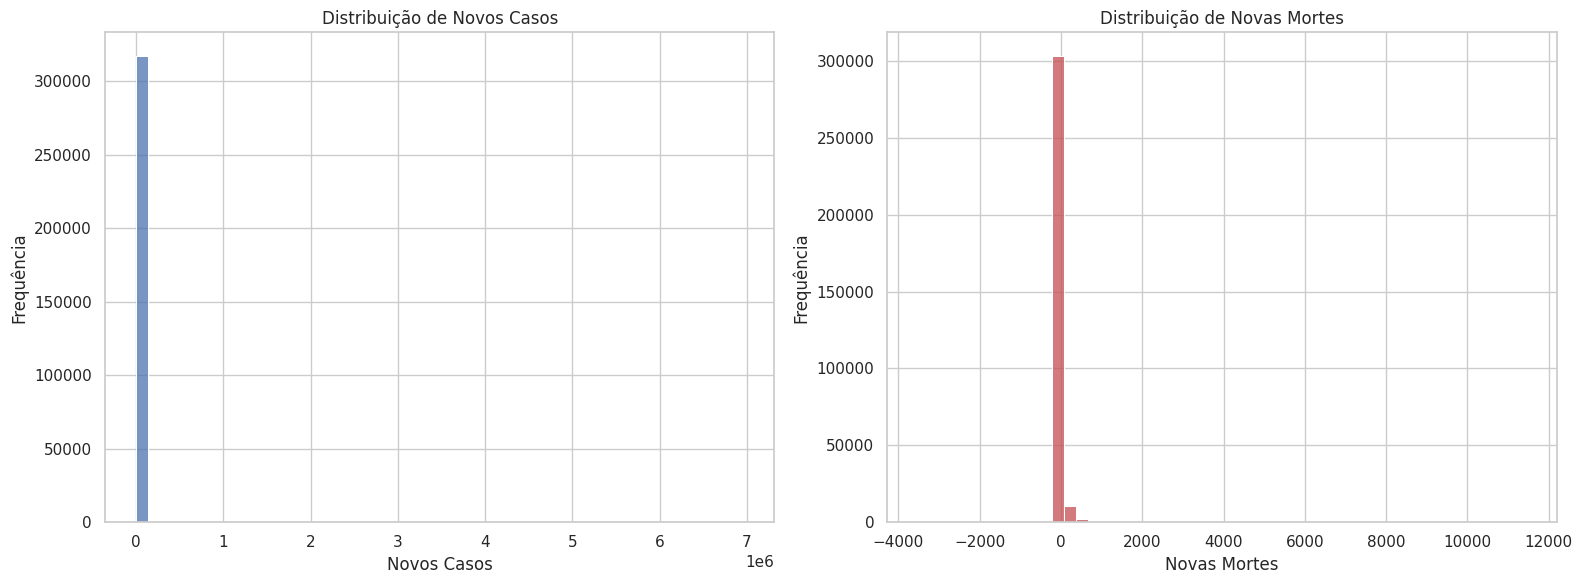

In [ ]:
# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Criando subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma para New_cases
sns.histplot(df['New_cases'], bins=50, kde=False, ax=axes[0])
axes[0].set_title('Distribuição de Novos Casos')
axes[0].set_xlabel('Novos Casos')
axes[0].set_ylabel('Frequência')

# Histograma para New_deaths
sns.histplot(df['New_deaths'], bins=50, kde=False, ax=axes[1], color='r')
axes[1].set_title('Distribuição de Novas Mortes')
axes[1].set_xlabel('Novas Mortes')
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

Esses histogramas não mostram muita informação da maneira que foram gerados pois a ordem de grandeza não permite uma boa visualização, uma escala em log deve melhorar o resultado.

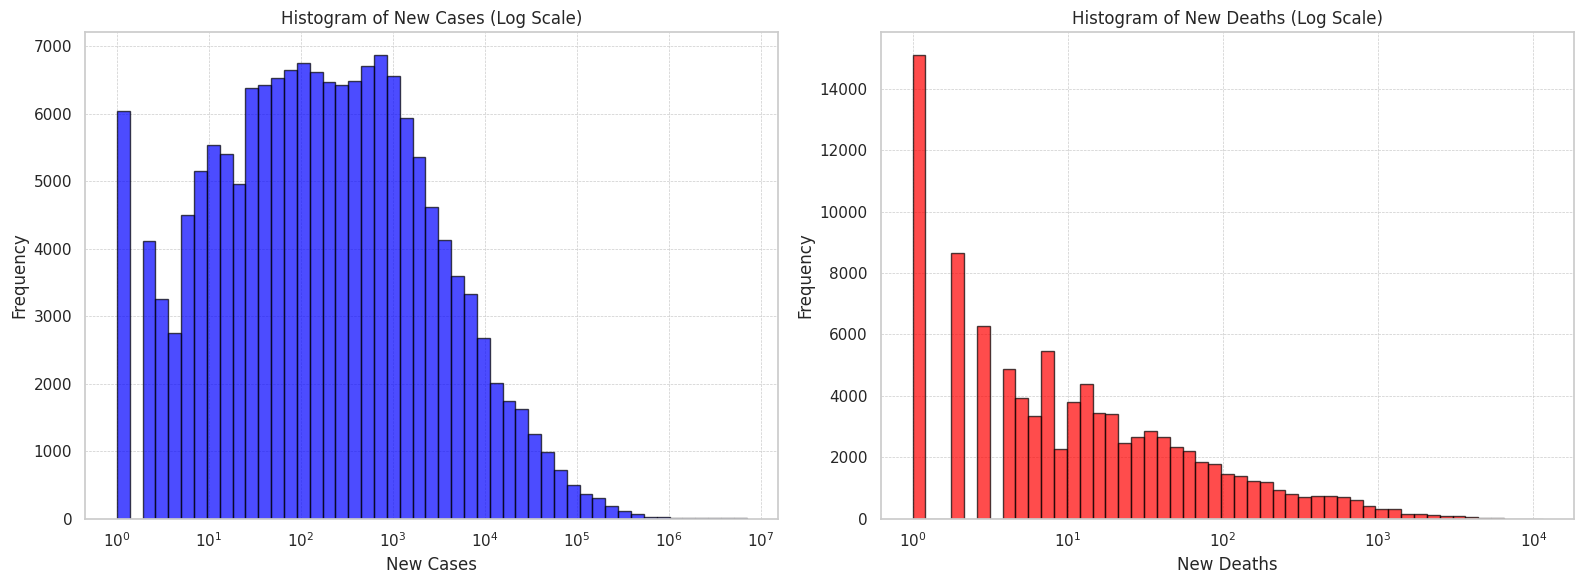

In [ ]:
new_cases = df['New_cases']
new_deaths = df['New_deaths']


fig, axes = plt.subplots(1, 2, figsize=(16, 6))


axes[0].hist(new_cases, bins=np.logspace(np.log10(1), np.log10(new_cases.max() + 1), 50), color='blue', edgecolor='black', alpha=0.7)
axes[0].set_xscale('log')
axes[0].set_title('Histogram of New Cases (Log Scale)')
axes[0].set_xlabel('New Cases')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, linestyle='--', linewidth=0.5)


axes[1].hist(new_deaths, bins=np.logspace(np.log10(1), np.log10(new_deaths.max() + 1), 50), color='red', edgecolor='black', alpha=0.7)
axes[1].set_xscale('log')
axes[1].set_title('Histogram of New Deaths (Log Scale)')
axes[1].set_xlabel('New Deaths')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, linestyle='--', linewidth=0.5)

# Show plots
plt.tight_layout()
plt.show()

Agora sim. É possível visualizar a distribuição de novos casos e novas mortes com mais clareza e ver quais foram as maiores concentrações. Para entender a distribuição a fundo, podemos fazer o histograma por paises que tiveram mais casos.

<ipython-input-164-870d57c21422>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = df.groupby('Country').sum().reset_index()


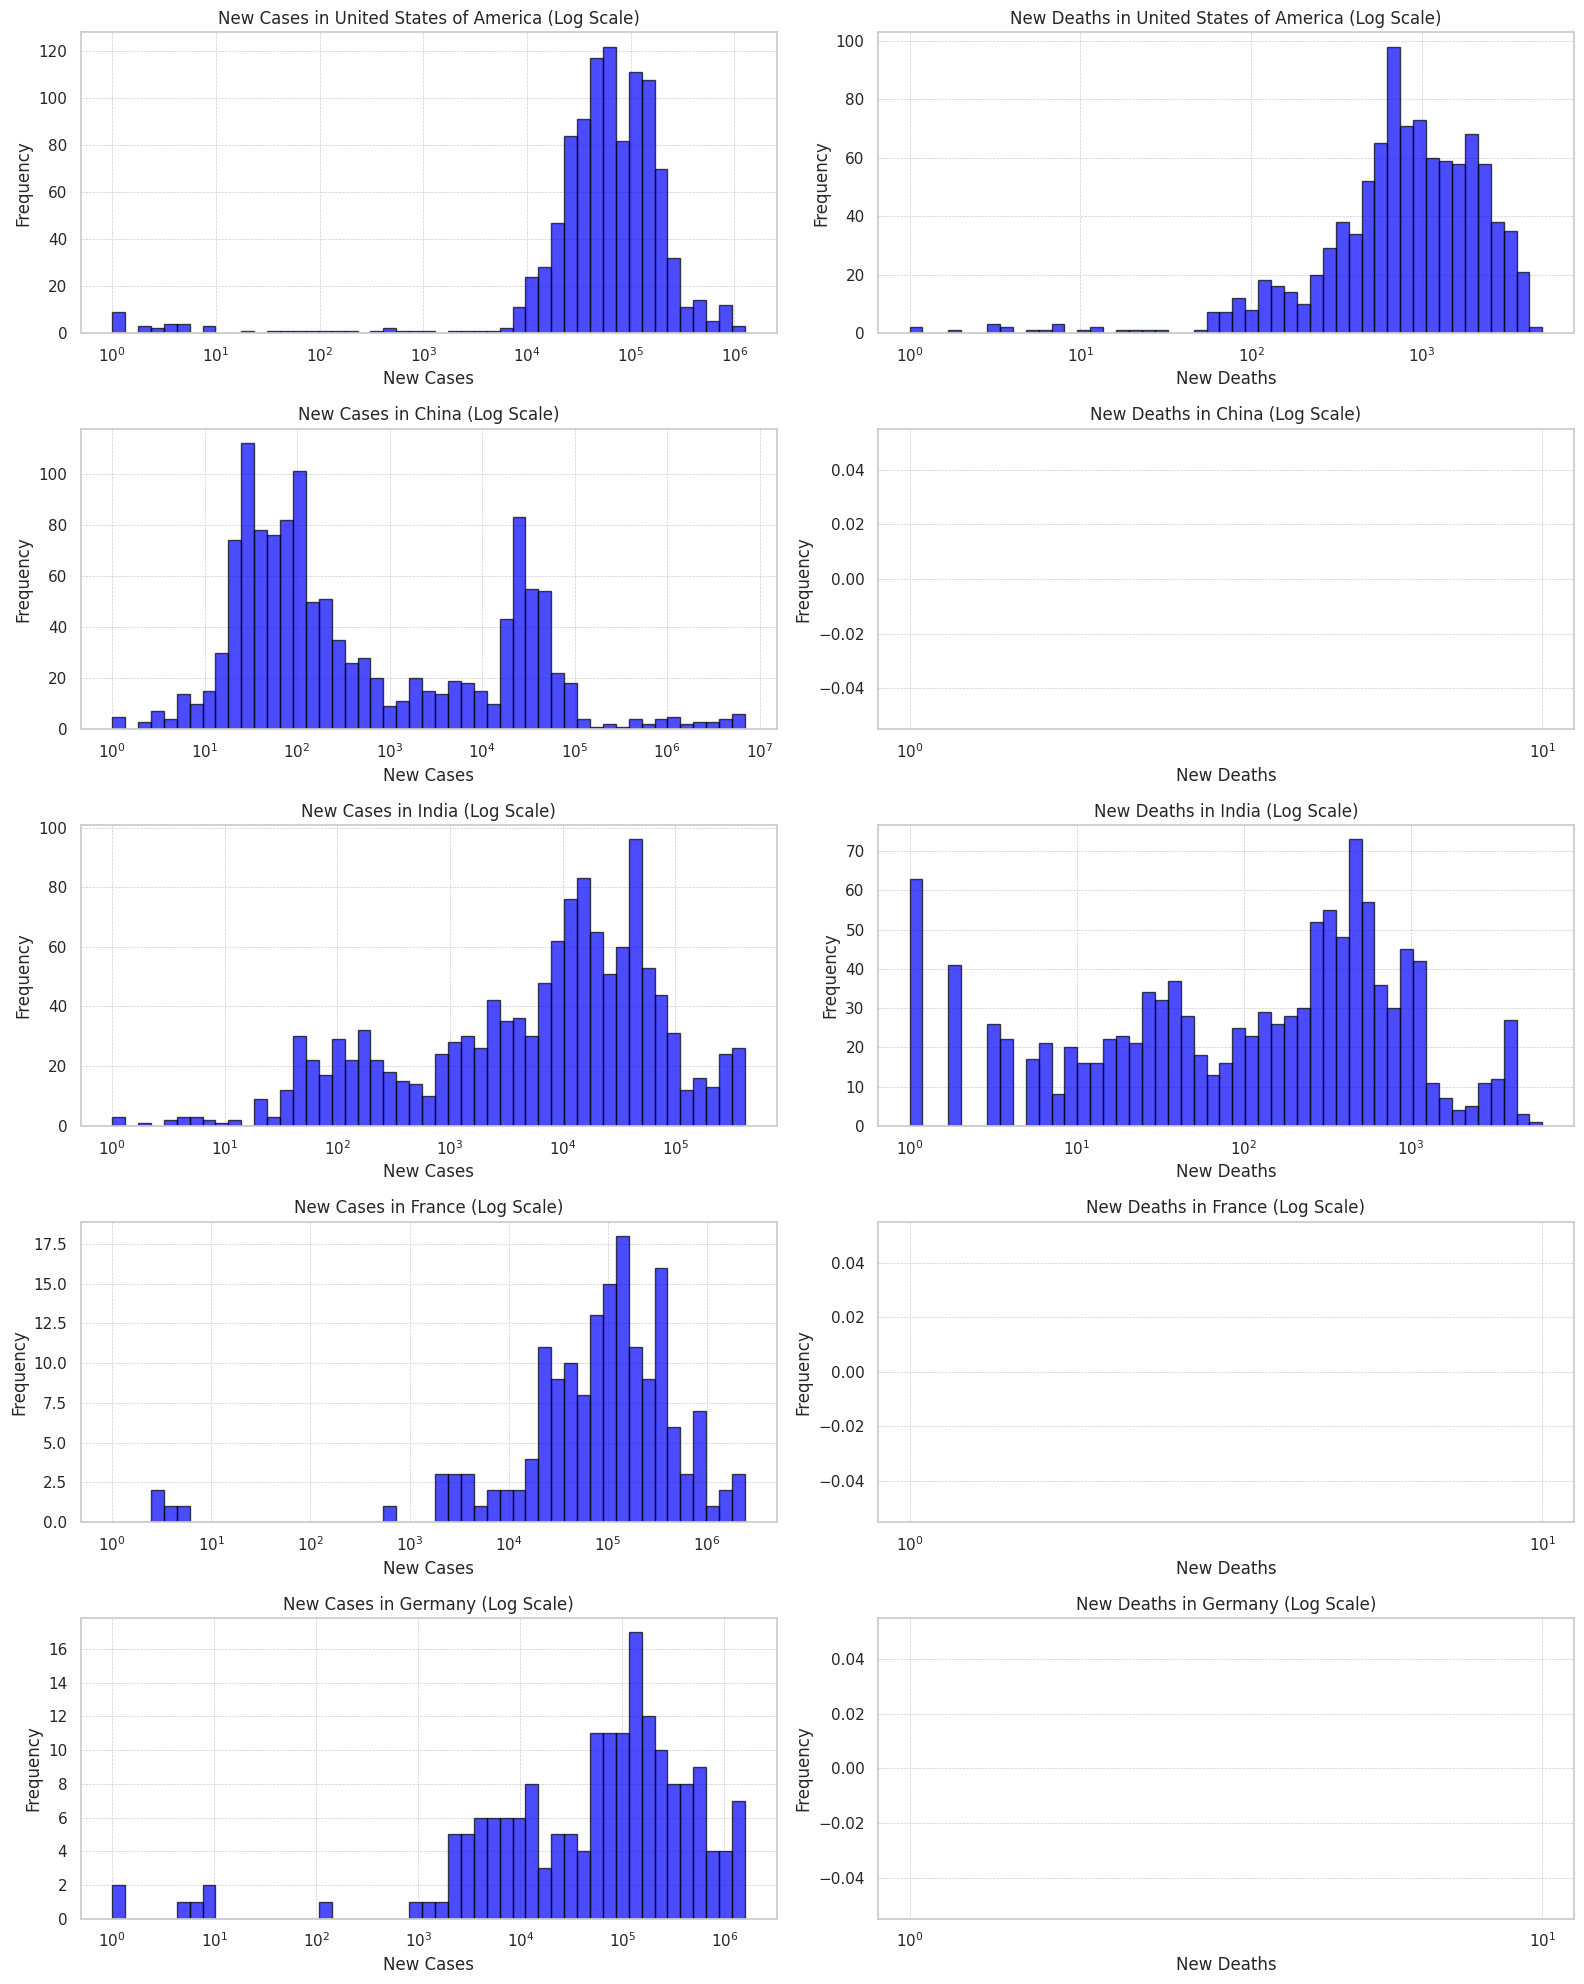

In [ ]:
# Group the data by country and sum up the new cases to find the countries with the most cases
grouped_df = df.groupby('Country').sum().reset_index()
top_countries_cases = grouped_df.sort_values(by='New_cases', ascending=False).head(5)['Country']
top_countries_deaths = grouped_df.sort_values(by='New_deaths', ascending=False).head(5)['Country']

# Filter the original dataframe to include only the top countries
filtered_df_cases = df[df['Country'].isin(top_countries_cases)]
filtered_df_deaths = df[df['Country'].isin(top_countries_deaths)]

# Create subplots for each country
fig, axes = plt.subplots(5, 2, figsize=(16, 20))

# Flatten axes for easier indexing
axes = axes.flatten()

# Generate histograms for each country
idx = 0

for i, country in enumerate(top_countries_cases):
    country_data = filtered_df_cases[filtered_df_cases['Country'] == country]
    axes[idx].hist(country_data['New_cases'], bins=np.logspace(np.log10(1), np.log10(country_data['New_cases'].max() + 1), 50), color='blue', edgecolor='black', alpha=0.7)
    axes[idx].set_xscale('log')
    axes[idx].set_title(f'New Cases in {country} (Log Scale)')
    axes[idx].set_xlabel('New Cases')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, linestyle='--', linewidth=0.5)
    idx+=1
    country_data = filtered_df_deaths[filtered_df_deaths['Country'] == country]
    axes[idx].hist(country_data['New_deaths'], bins=np.logspace(np.log10(1), np.log10(country_data['New_deaths'].max() + 1), 50), color='blue', edgecolor='black', alpha=0.7)
    axes[idx].set_xscale('log')
    axes[idx].set_title(f'New Deaths in {country} (Log Scale)')
    axes[idx].set_xlabel('New Deaths')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, linestyle='--', linewidth=0.5)
    idx+=1

# Adjust layout
plt.tight_layout()
plt.show()

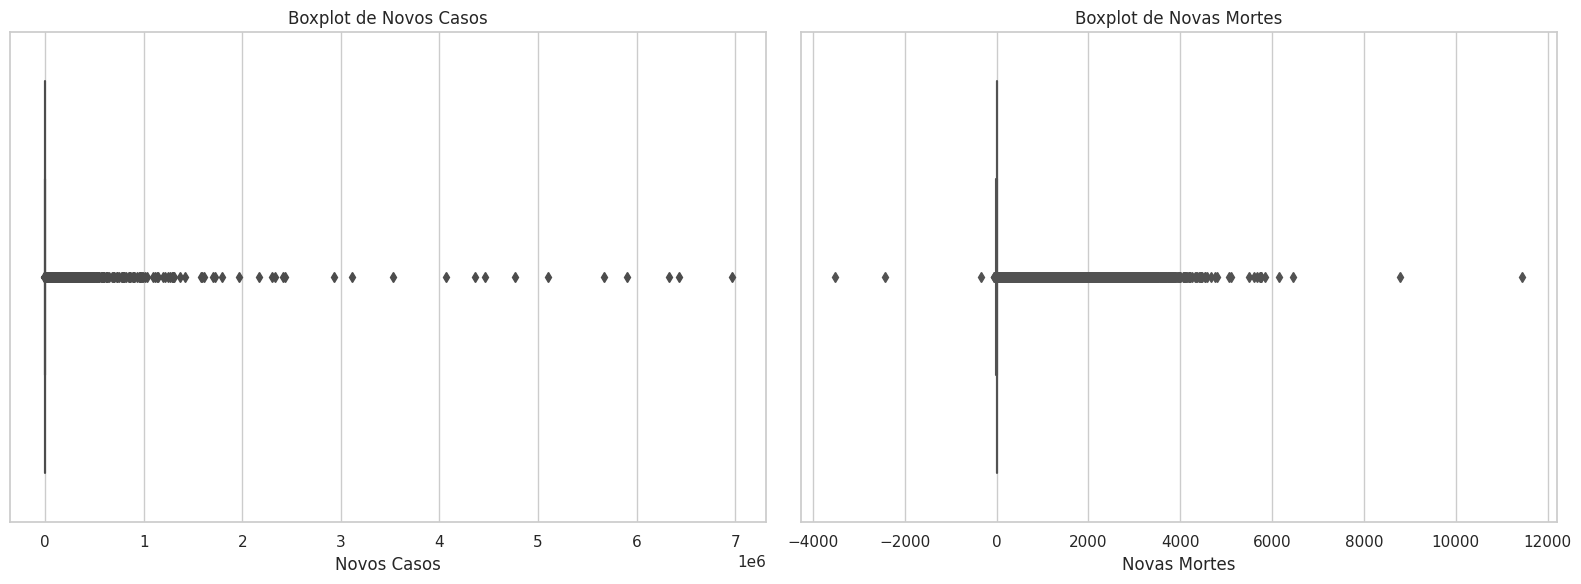

In [ ]:
# Criando subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot para New_cases
sns.boxplot(x=df['New_cases'], ax=axes[0])
axes[0].set_title('Boxplot de Novos Casos')
axes[0].set_xlabel('Novos Casos')

# Boxplot para New_deaths
sns.boxplot(x=df['New_deaths'], ax=axes[1], color='r')
axes[1].set_title('Boxplot de Novas Mortes')
axes[1].set_xlabel('Novas Mortes')

plt.tight_layout()
plt.show()

É possível perceber que a maioria dos registros de casos e mores está concentrada próximo de 0, com outliers representando picos significativos de casos ou mortes.

Os números negativos representam correções no contagem que são realizadas periódicamente.



<ipython-input-138-250c8f15e619>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  global_data = df.groupby('Date_reported').sum().reset_index()


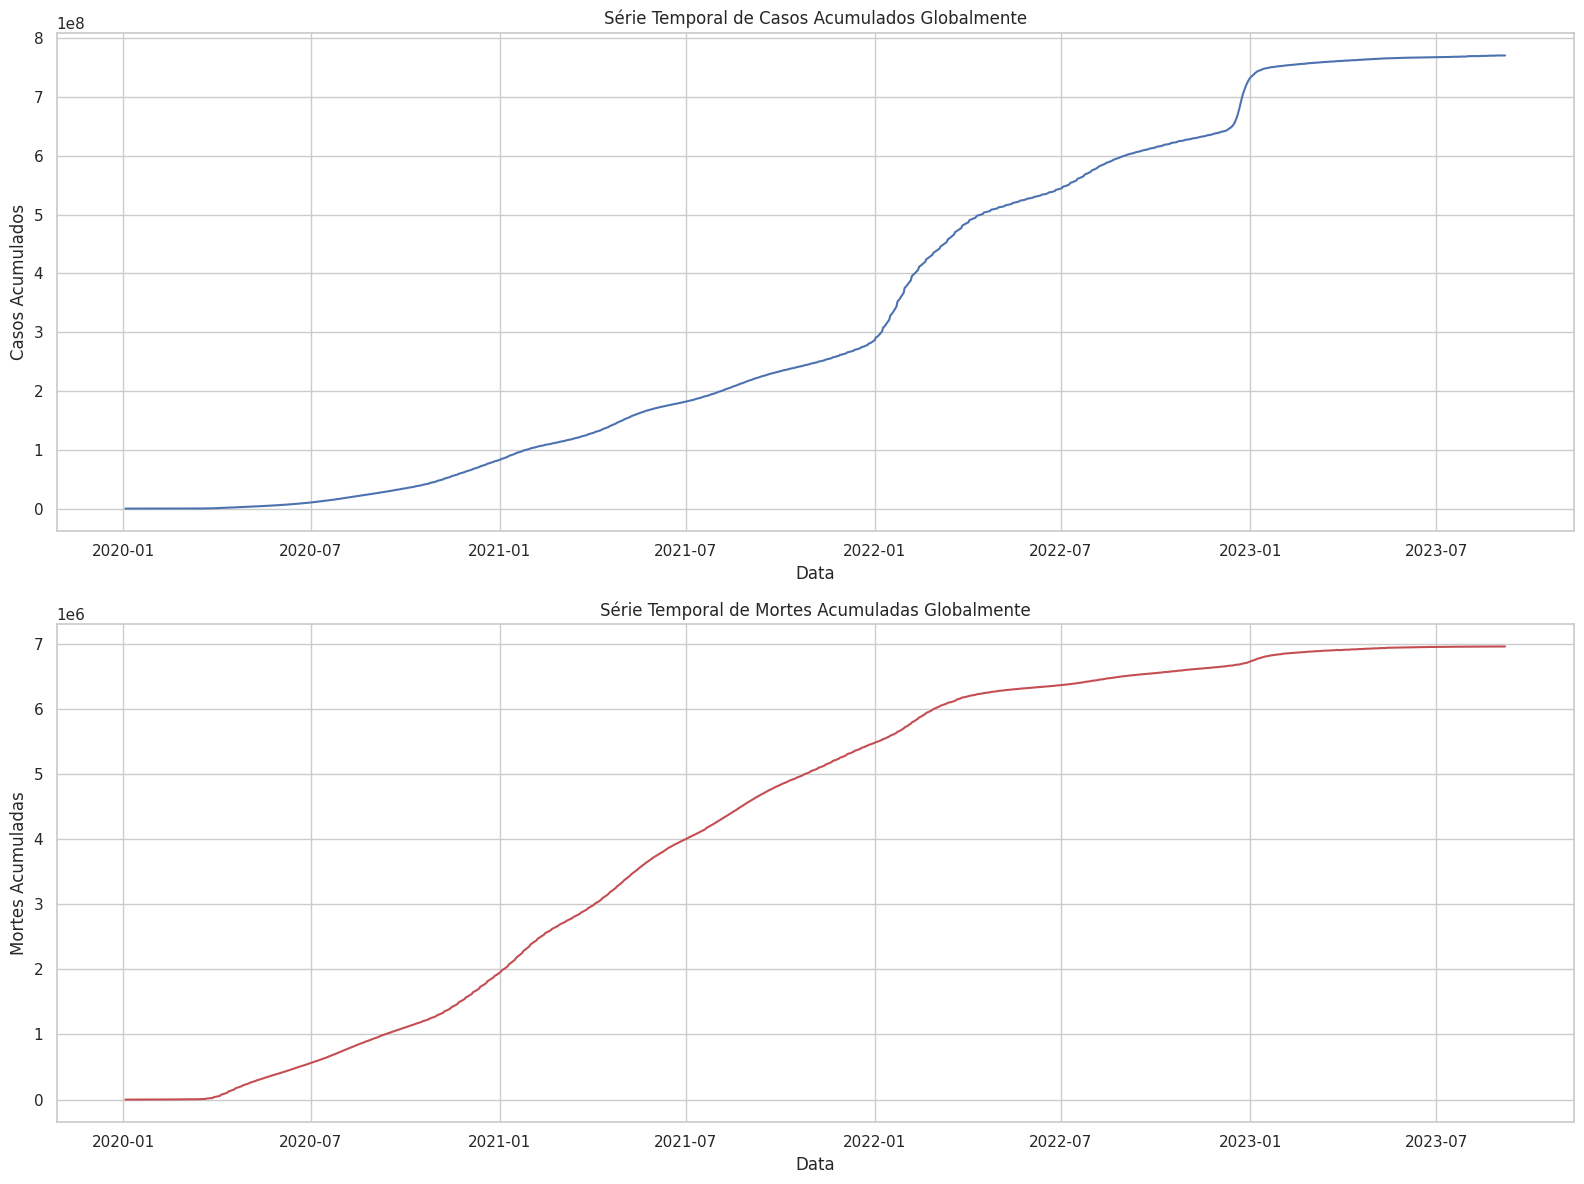

In [ ]:
# Agrupando dados por data e somando para obter contagem global
global_data = df.groupby('Date_reported').sum().reset_index()

# Criando a série temporal para casos e mortes acumulados
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Série temporal para Cumulative_cases
sns.lineplot(x='Date_reported', y='Cumulative_cases', data=global_data, ax=axes[0])
axes[0].set_title('Série Temporal de Casos Acumulados Globalmente')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Casos Acumulados')

# Série temporal para Cumulative_deaths
sns.lineplot(x='Date_reported', y='Cumulative_deaths', data=global_data, ax=axes[1], color='r')
axes[1].set_title('Série Temporal de Mortes Acumuladas Globalmente')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Mortes Acumuladas')

plt.tight_layout()
plt.show()

Os dados temporais são interessantes para identificar como o Covid evoluir com o passar os meses.


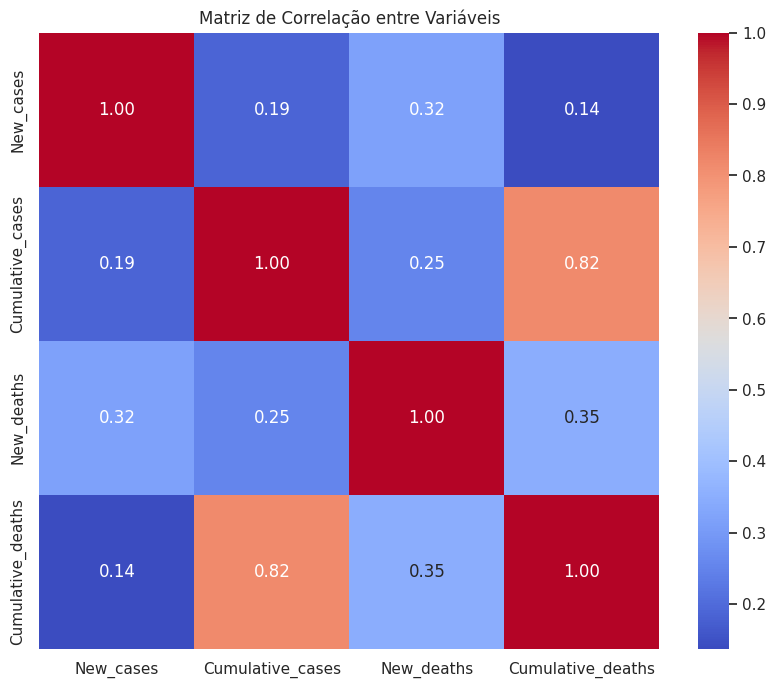

In [ ]:
# Calculando a matriz de correlação entre as variáveis numéricas
correlation_matrix = df[['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']].corr()

# Visualizando a matriz de correlação com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Variáveis')
plt.show()

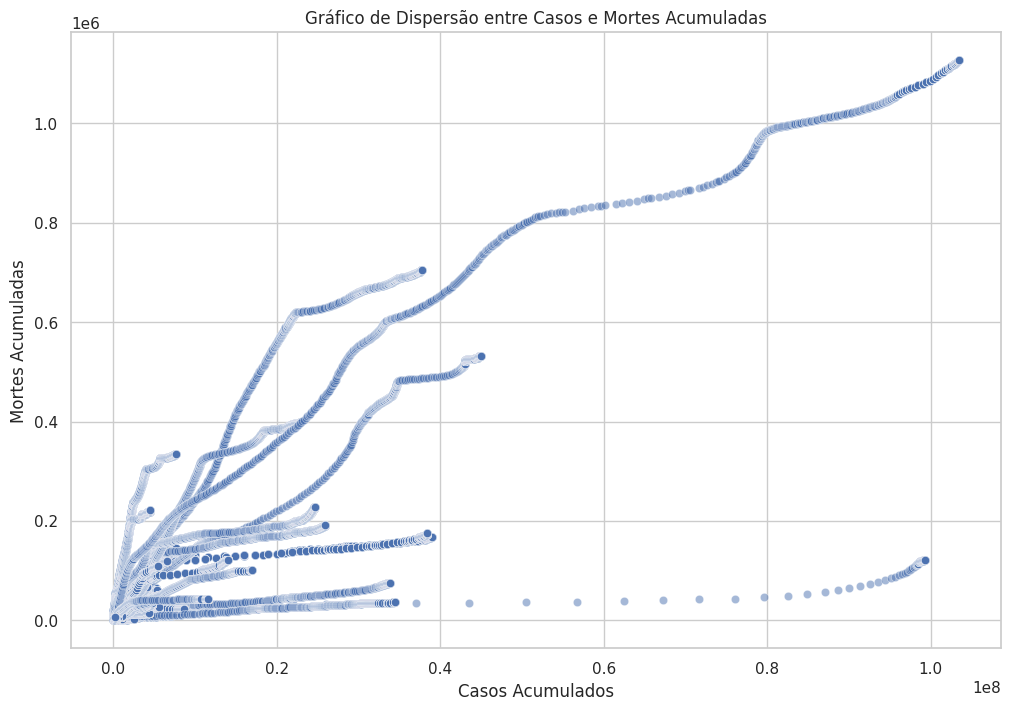

In [ ]:
# Gráfico de dispersão para Cumulative_cases e Cumulative_deaths
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Cumulative_cases', y='Cumulative_deaths', data=df, alpha=0.5)
plt.title('Gráfico de Dispersão entre Casos e Mortes Acumuladas')
plt.xlabel('Casos Acumulados')
plt.ylabel('Mortes Acumuladas')
plt.show()

In [ ]:
# Calculando a média de novos casos e novas mortes para cada região da OMS
region_avg = df.groupby('WHO_region').mean()[['New_cases', 'New_deaths']].reset_index()

# Criando gráfico de barras
plt.figure(figsize=(12, 8))
bar_width = 0.35  # Largura das barras
index = range(len(region_avg['WHO_region']))  # Índice das barras

# Barras para New_cases
bar1 = plt.bar(index, region_avg['New_cases'], bar_width, label='Novos Casos', color='b', alpha=0.7)

# Barras para New_deaths
bar2 = plt.bar([i + bar_width for i in index], region_avg['New_deaths'], bar_width, label='Novas Mortes', color='r', alpha=0.7)

# Adicionando detalhes ao gráfico
plt.xlabel('Região da OMS')
plt.ylabel('Média')
plt.title('Média de Novos Casos e Novas Mortes por Região da OMS')

plt.legend()

plt.tight_layout()
plt.show()

NameError: ignored

O gráfico mostra a média de novos casos e novas mortes em cada uma das regiões da OMS. Podemos observar que:

- A região das Américas (AMRO) tem a média mais alta tanto para novos casos quanto para novas mortes.
- A região do Sudeste Asiático (SEARO) segue em segundo lugar em termos de média de novos casos, enquanto a região do Mediterrâneo Oriental (EMRO) é a segunda em termos de média de novas mortes.

Isso nos dá uma visão inicial sobre como a pandemia tem impactado diferentes regiões globais de forma desigual.

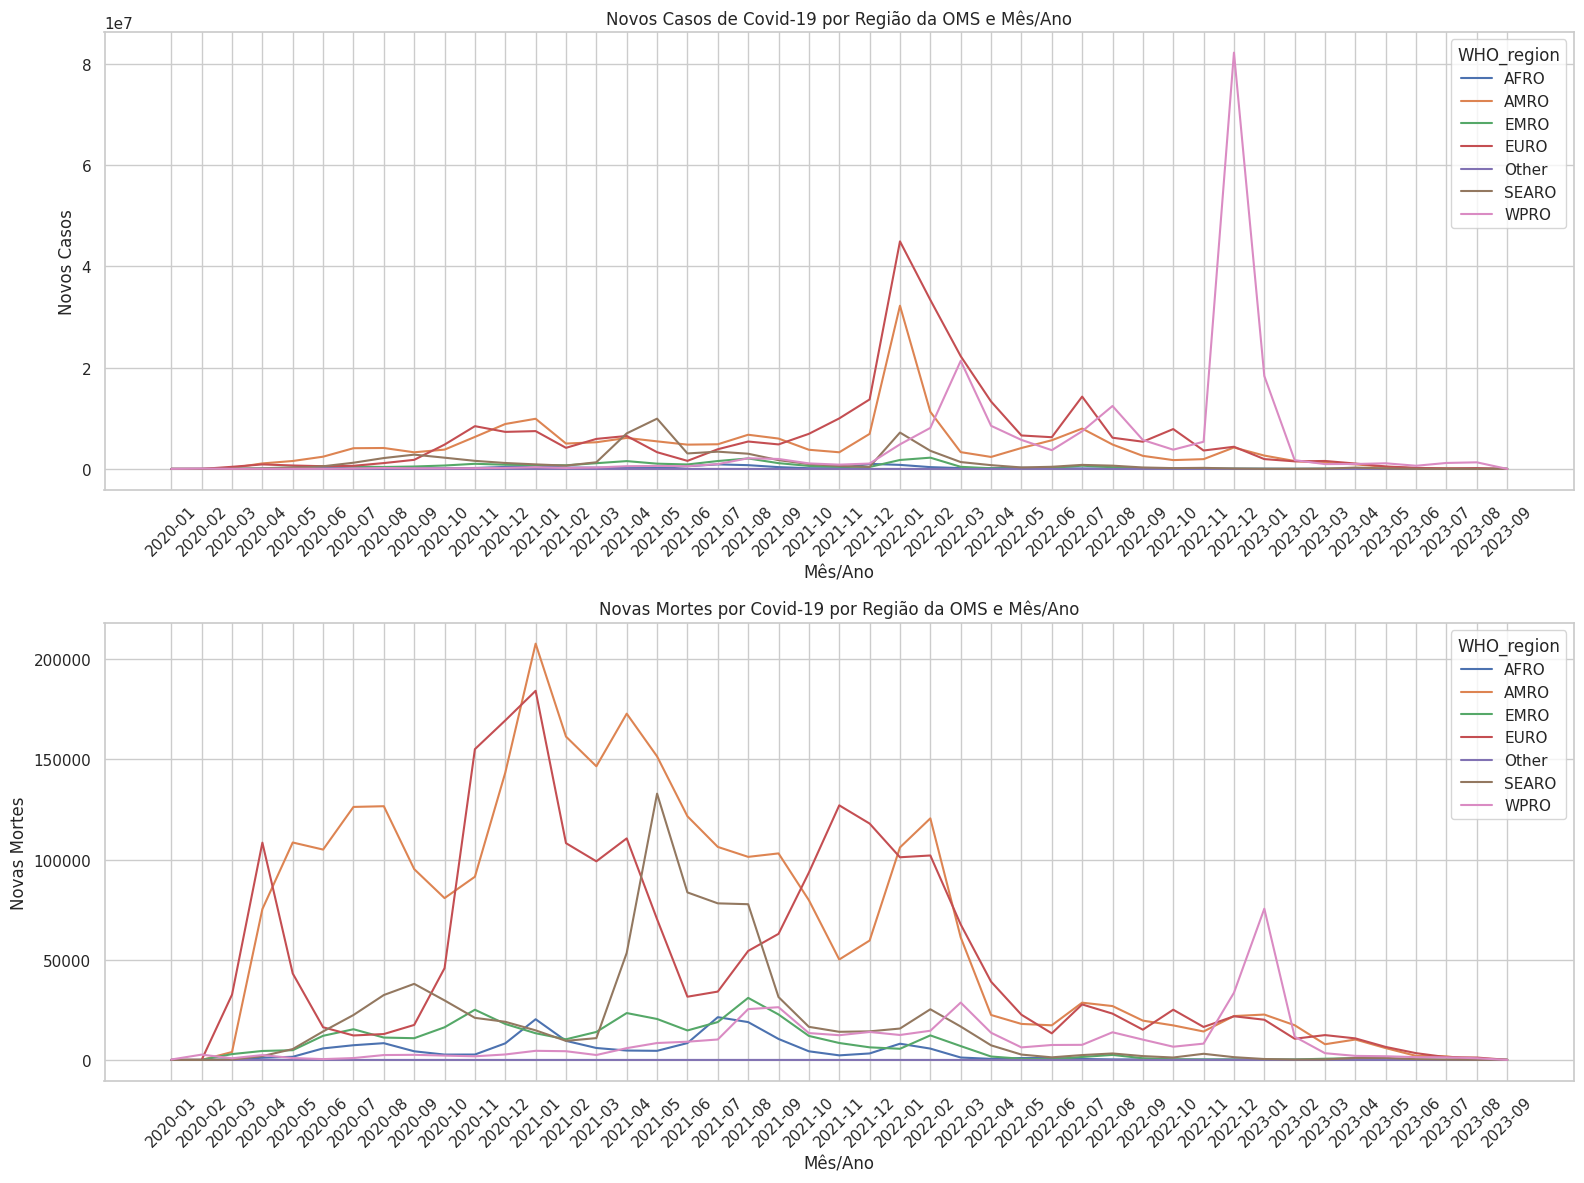

In [ ]:
# Extraindo o mês e o ano da data para a análise sazonal
df['Year-Month'] = df['Date_reported'].dt.to_period('M')

# Agrupando dados por mês e ano e calculando quantidade de casos e mortes
seasonal_data = df.groupby(['WHO_region', 'Year-Month']).agg({'New_cases': 'sum', 'New_deaths': 'sum'}).reset_index()
seasonal_data['Year-Month'] = seasonal_data['Year-Month'].astype(str)

fig, axes = plt.subplots(2, 1, figsize=(16, 12))

sns.lineplot(x='Year-Month', y='New_cases', hue='WHO_region', data=seasonal_data, ax=axes[0])
sns.lineplot(x='Year-Month', y='New_deaths', hue='WHO_region', data=seasonal_data, ax=axes[1])

axes[0].set_title('Novos Casos de Covid-19 por Região da OMS e Mês/Ano')
axes[0].set_xlabel('Mês/Ano')
axes[0].set_ylabel('Novos Casos')
axes[0].tick_params(axis='x', labelrotation=45)
axes[0].grid(True)


axes[1].set_title('Novas Mortes por Covid-19 por Região da OMS e Mês/Ano')
axes[1].set_xlabel('Mês/Ano')
axes[1].set_ylabel('Novas Mortes')
axes[1].tick_params(axis='x', labelrotation=45)
axes[1].grid(True)

plt.tight_layout()
plt.show()

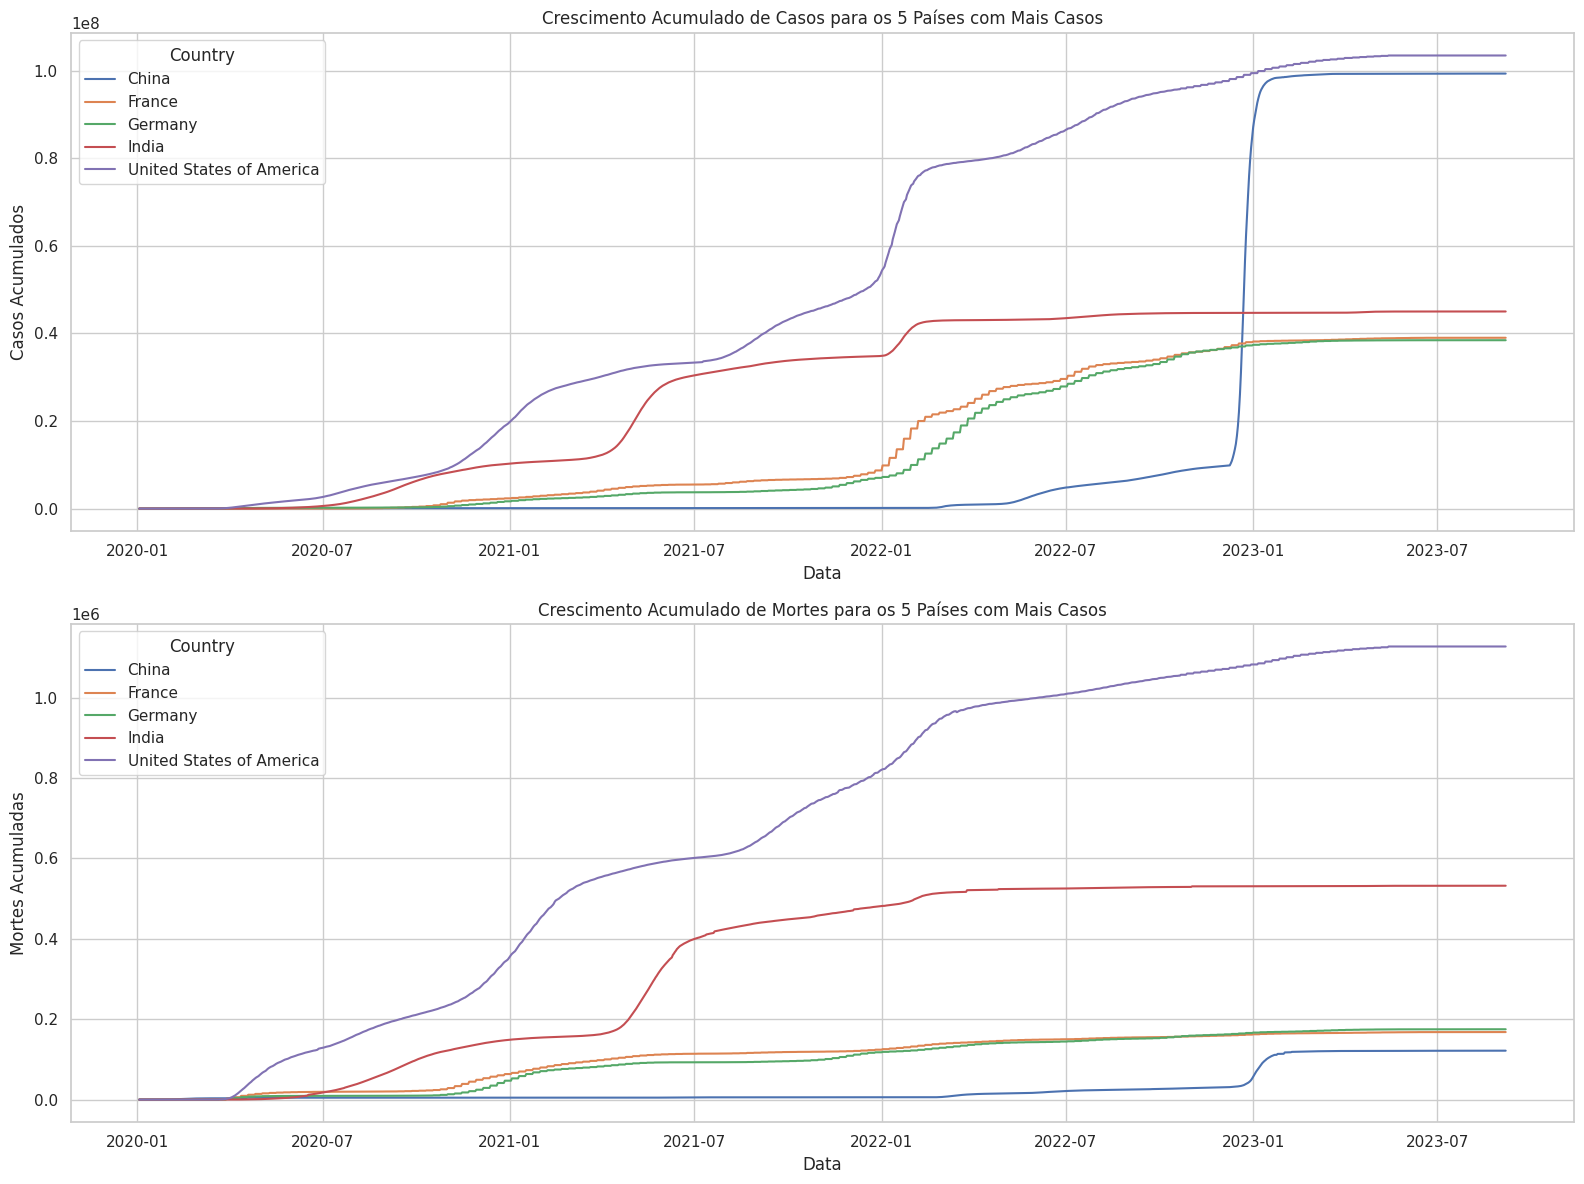

In [ ]:
# Identificando os 5 países com mais casos acumulados
top_countries = df.groupby('Country').max().sort_values(by='Cumulative_cases', ascending=False).head(5).reset_index()['Country']

# Filtrando o dataset para incluir apenas esses 5 países
top_countries_data = df[df['Country'].isin(top_countries)]

# Criando o gráfico de linha para crescimento acumulado
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Gráfico para Cumulative_cases
sns.lineplot(x='Date_reported', y='Cumulative_cases', hue='Country', data=top_countries_data, ax=axes[0])
axes[0].set_title('Crescimento Acumulado de Casos para os 5 Países com Mais Casos')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Casos Acumulados')

# Gráfico para Cumulative_deaths
sns.lineplot(x='Date_reported', y='Cumulative_deaths', hue='Country', data=top_countries_data, ax=axes[1])
axes[1].set_title('Crescimento Acumulado de Mortes para os 5 Países com Mais Casos')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Mortes Acumuladas')

plt.tight_layout()
plt.show()

<ipython-input-159-6989e0c90f24>:34: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


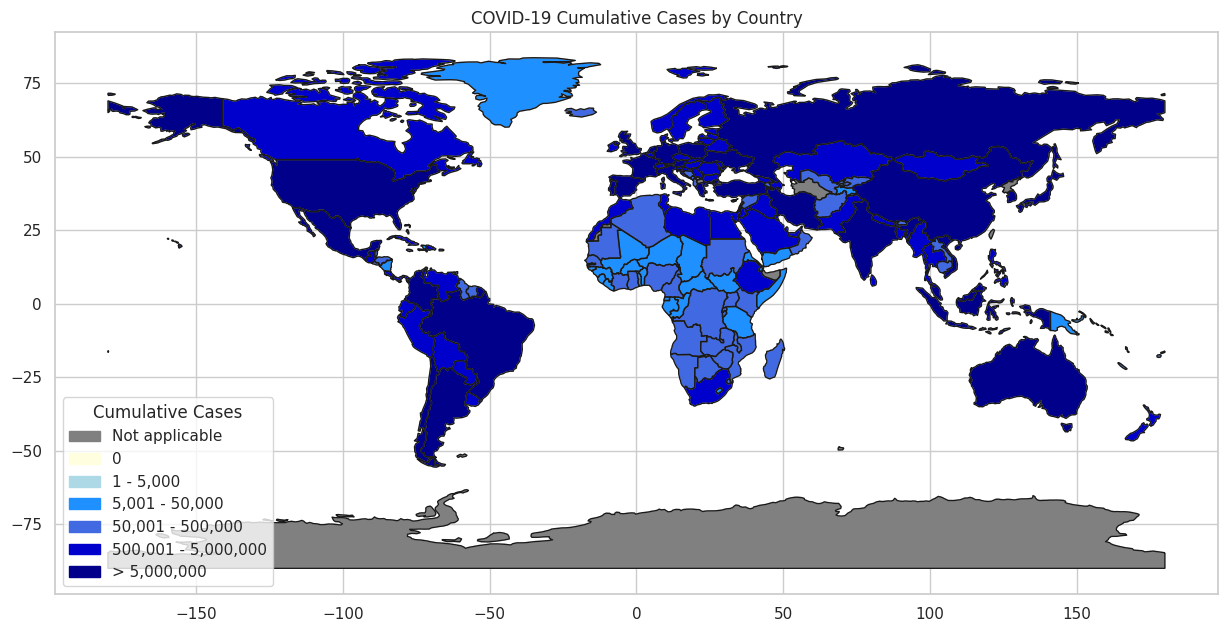

In [ ]:
import matplotlib.patches as mpatches
import geopandas as gpd

agg_data = df.groupby('Country').max()['Cumulative_cases'].reset_index()

# Normalizar nomes dos países
country_mapping = {
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Bosnia and Herzegovina': 'Bosnia and Herz.',
    'Brunei Darussalam': 'Brunei',
    'Central African Republic': 'Central African Rep.',
    "Côte d’Ivoire": "Côte d'Ivoire",
    'Democratic Republic of the Congo': 'Dem. Rep. Congo',
    'Dominican Republic': 'Dominican Rep.',
    'Equatorial Guinea': 'Eq. Guinea',
    'Iran (Islamic Republic of)': 'Iran',
    "Lao People's Democratic Republic": 'Laos',
    'North Macedonia': 'Macedonia',
    'Republic of Moldova': 'Moldova',
    'Republic of Korea': 'South Korea',
    'Russian Federation': 'Russia',
    'South Sudan': 'S. Sudan',
    'Syrian Arab Republic': 'Syria',
    'The United Kingdom': 'United Kingdom',
    'United Republic of Tanzania': 'Tanzania',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Viet Nam': 'Vietnam',
    'Eswatini': 'eSwatini',
    'Türkiye': 'Turkey'
}
agg_data['Normalized_Country'] = agg_data['Country'].apply(lambda x: country_mapping.get(x, x))

# Mesclar com dados de geometria do mundo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = world.set_index('name').join(agg_data.set_index('Normalized_Country'))

# Definir classes e esquema de cores
bins = [-1, 0, 1, 5000, 50000, 500000, 5000000, float('inf')]
labels = ['Not applicable', '0', '1 - 5,000', '5,001 - 50,000', '50,001 - 500,000', '500,001 - 5,000,000', '> 5,000,000']
merged_data['class'] = pd.cut(merged_data['Cumulative_cases'], bins=bins, labels=labels)

color_map_updated = {
    'Not applicable': 'grey',
    '0': 'lightyellow',
    '1 - 5,000': 'lightblue',
    '5,001 - 50,000': 'dodgerblue',
    '50,001 - 500,000': 'royalblue',
    '500,001 - 5,000,000': 'mediumblue',
    '> 5,000,000': 'darkblue'
}
merged_data['class_color'] = merged_data['class'].map(color_map_updated)
merged_data['class_color'].fillna('grey', inplace=True)

# Gerar o mapa de calor
fig, ax = plt.subplots(1, figsize=(15, 10))
merged_data.boundary.plot(ax=ax, linewidth=1, color='k')
merged_data.plot(color=merged_data['class_color'], linewidth=0.8, ax=ax, edgecolor='0.8')

# Adicionar legenda
legend_labels = [mpatches.Patch(color=color, label=label) for label, color in color_map_updated.items()]
plt.legend(handles=legend_labels, title='Cumulative Cases', loc='lower left')

plt.title('COVID-19 Cumulative Cases by Country')
plt.show()

<ipython-input-161-ac7c6e86cb7d>:31: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


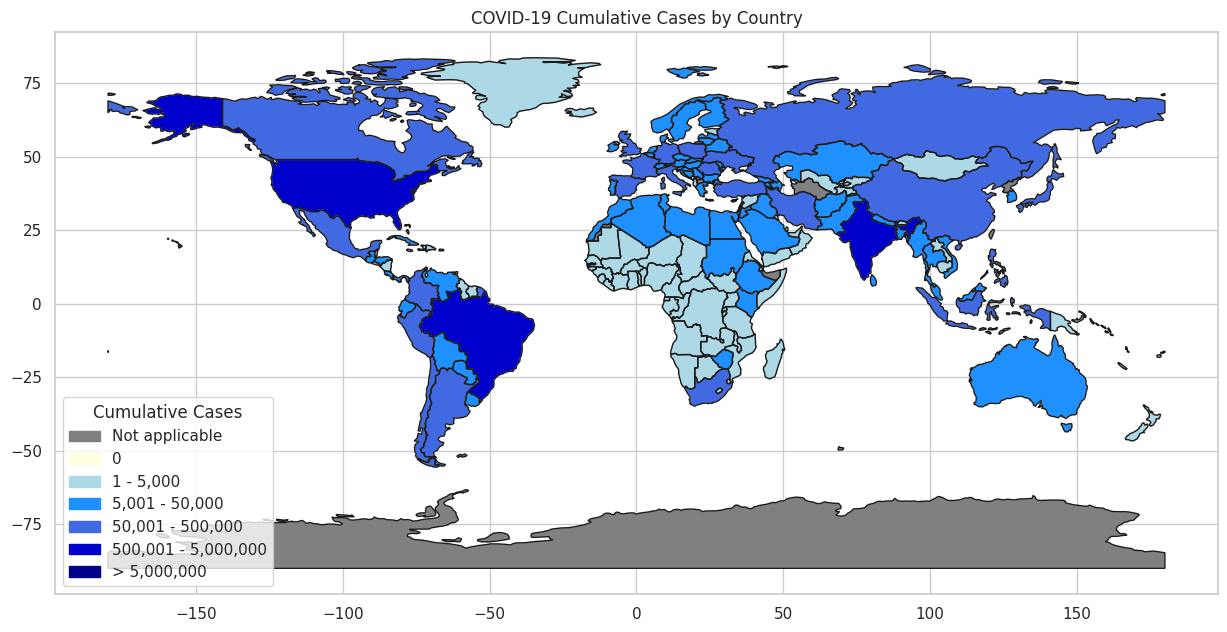

In [ ]:
agg_data = df.groupby('Country').max()['Cumulative_deaths'].reset_index()

# Normalizar nomes dos países
country_mapping = {
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Bosnia and Herzegovina': 'Bosnia and Herz.',
    'Brunei Darussalam': 'Brunei',
    'Central African Republic': 'Central African Rep.',
    "Côte d’Ivoire": "Côte d'Ivoire",
    'Democratic Republic of the Congo': 'Dem. Rep. Congo',
    'Dominican Republic': 'Dominican Rep.',
    'Equatorial Guinea': 'Eq. Guinea',
    'Iran (Islamic Republic of)': 'Iran',
    "Lao People's Democratic Republic": 'Laos',
    'North Macedonia': 'Macedonia',
    'Republic of Moldova': 'Moldova',
    'Republic of Korea': 'South Korea',
    'Russian Federation': 'Russia',
    'South Sudan': 'S. Sudan',
    'Syrian Arab Republic': 'Syria',
    'The United Kingdom': 'United Kingdom',
    'United Republic of Tanzania': 'Tanzania',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Viet Nam': 'Vietnam',
    'Eswatini': 'eSwatini',
    'Türkiye': 'Turkey'
}
agg_data['Normalized_Country'] = agg_data['Country'].apply(lambda x: country_mapping.get(x, x))

# Mesclar com dados de geometria do mundo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = world.set_index('name').join(agg_data.set_index('Normalized_Country'))

# Definir classes e esquema de cores
bins = [-1, 0, 1, 5000, 50000, 500000, 5000000, float('inf')]
labels = ['Not applicable', '0', '1 - 5,000', '5,001 - 50,000', '50,001 - 500,000', '500,001 - 5,000,000', '> 5,000,000']
merged_data['class'] = pd.cut(merged_data['Cumulative_deaths'], bins=bins, labels=labels)

color_map_updated = {
    'Not applicable': 'grey',
    '0': 'lightyellow',
    '1 - 5,000': 'lightblue',
    '5,001 - 50,000': 'dodgerblue',
    '50,001 - 500,000': 'royalblue',
    '500,001 - 5,000,000': 'mediumblue',
    '> 5,000,000': 'darkblue'
}
merged_data['class_color'] = merged_data['class'].map(color_map_updated)
merged_data['class_color'].fillna('grey', inplace=True)

# Gerar o mapa de calor
fig, ax = plt.subplots(1, figsize=(15, 10))
merged_data.boundary.plot(ax=ax, linewidth=1, color='k')
merged_data.plot(color=merged_data['class_color'], linewidth=0.8, ax=ax, edgecolor='0.8')

# Adicionar legenda
legend_labels = [mpatches.Patch(color=color, label=label) for label, color in color_map_updated.items()]
plt.legend(handles=legend_labels, title='Cumulative Deaths', loc='lower left')

plt.title('COVID-19 Cumulative deaths by Country')
plt.show()